## Monte Carlo - Forecasting Stock Prices - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Forecasting Future Stock Prices – continued:

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='google', start='2002-1-1')['Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [2]:
S0 = data.iloc[-1]
S0

MSFT    68.57
Name: 2017-07-06 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [4]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Set the values on the first row of the price_list array equal to S0.

In [5]:
price_list[0] = S0
price_list

array([[ 68.57,  68.57,  68.57, ...,  68.57,  68.57,  68.57],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ..., 
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [6]:
for t in xrange(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[ 68.57      ,  68.57      ,  68.57      , ...,  68.57      ,
         68.57      ,  68.57      ],
       [ 69.83470566,  69.65754632,  68.21974209, ...,  66.76893541,
         69.3688911 ,  69.14894346],
       [ 69.8367765 ,  70.89222991,  68.09511018, ...,  66.75475314,
         68.15894021,  70.21692707],
       ..., 
       [ 69.04757992,  66.57045767,  65.37583833, ...,  78.93699125,
         61.01379129,  61.69340647],
       [ 68.42834128,  65.93834262,  65.30745039, ...,  80.35430032,
         62.45886564,  62.48003797],
       [ 69.38615396,  67.01454496,  66.83777076, ...,  81.24195064,
         63.5468066 ,  62.25564734]])

Finally, plot the obtained price list data.

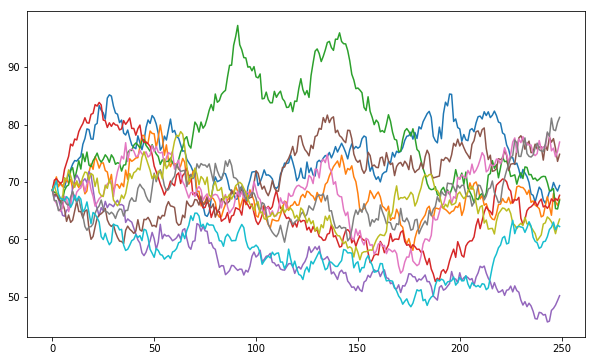

In [8]:
plt.figure(figsize=(10,6))
plt.plot(price_list);